In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_excel("/content/drive/MyDrive/ESG/Code/data_2.xlsx")


In [ ]:
data.head()

,name,year,text,old_label,old_label_2,label
0,Ngân hàng NN&PT Nông thôn Việt Nam,2023,"Đây là sự kiện quan trọng, có ý nghĩa to lớn đ...",S0,S0,3
1,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Tiên phong thể hiện trách nhiệm của Ngân hàng ...,S3,S3,3
2,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Agribank nghiêm túc triển khai các chương trìn...,S3,S3,3
3,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Đây là tiền đề để Agribank nâng cao năng lực t...,G3,G3,3
4,Ngân hàng NN&PT Nông thôn Việt Nam,2023,Triển khai các giải pháp nâng cao năng lực điề...,G3,G3,3


In [ ]:
# Nhóm dữ liệu theo 'year' và tính số lượng hoạt động CSR
action_per_year = data.groupby('year').size().reset_index(name='Action_per_year')


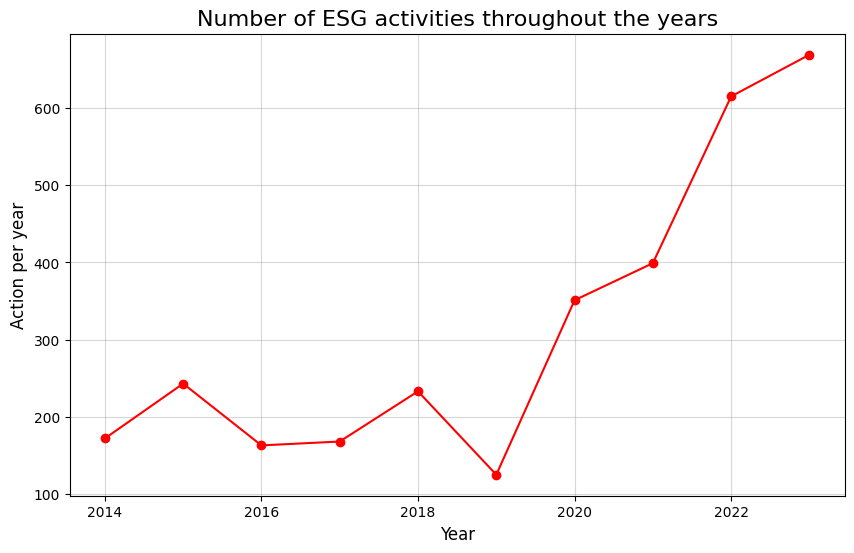

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(action_per_year['year'], action_per_year['Action_per_year'], marker='o', color='red', linestyle='-')
plt.title("Number of ESG activities throughout the years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Action per year", fontsize=12)
plt.grid(alpha=0.5)
plt.show()


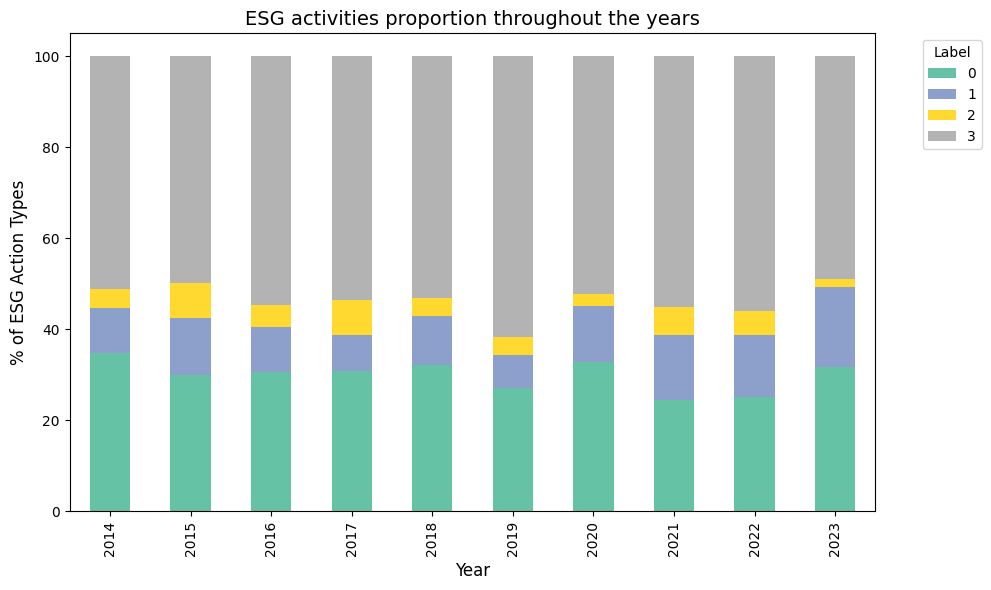

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dữ liệu từ hình ảnh (thay bằng file CSV thực tế của bạn)
df = data

# Bước 1: Đếm số lượng hoạt động theo năm và nhãn
df['count'] = 1  # Thêm cột đếm
grouped = df.groupby(['year', 'label'])['count'].sum().reset_index()

# Bước 2: Tính tỷ lệ phần trăm cho mỗi nhãn trong từng năm
total_by_year = grouped.groupby('year')['count'].sum().reset_index()
grouped = grouped.merge(total_by_year, on='year', suffixes=('', '_total'))
grouped['percentage'] = grouped['count'] / grouped['count_total'] * 100

# Bước 3: Chuyển đổi dữ liệu để vẽ stacked bar chart
pivot_table = grouped.pivot_table(values='percentage', index='year', columns='label', fill_value=0)

# Bước 4: Vẽ biểu đồ
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Thêm các thông tin biểu đồ
plt.title('ESG activities proportion throughout the years', fontsize=14)
plt.ylabel('% of ESG Action Types', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


<ipython-input-9-1311de2fa1b0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-1311de2fa1b0>:20: UserWarning: The palette list has more values (3138) than needed (10), which may not be intended.
  sns.barplot(


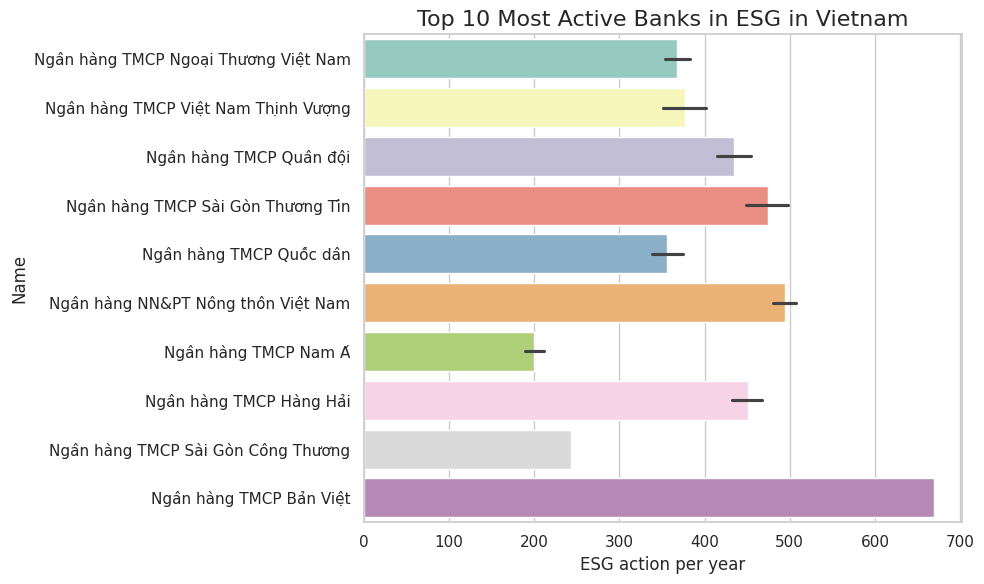

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the original data DataFrame
df = data

# Merge the 'Action_per_year' column from action_per_year DataFrame
df = pd.merge(df, action_per_year, on='year', how='left')

# Now you can sort by 'Action_per_year'
df = df.sort_values(by='Action_per_year', ascending=True)

# Thiết lập màu sắc và phong cách
sns.set(style="whitegrid")
palette = sns.color_palette("Set3", len(df))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Action_per_year',
    y='name',
    data=df,
    palette=palette
)

# Thêm tiêu đề và nhãn
plt.title('Top 10 Most Active Banks in ESG in Vietnam', fontsize=16)
plt.xlabel('ESG action per year', fontsize=12)
plt.ylabel('Name', fontsize=12)

# Tinh chỉnh hiển thị
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

<ipython-input-14-4ce68435322b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-4ce68435322b>:33: UserWarning: The palette list has more values (3138) than needed (10), which may not be intended.
  sns.barplot(


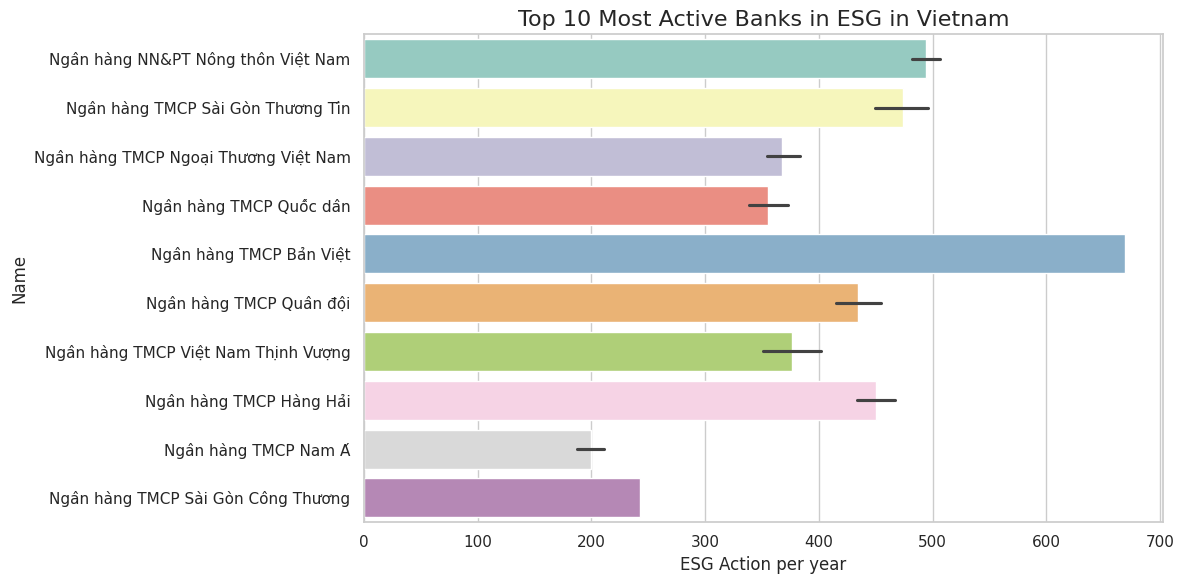

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data

# Merge the 'Action_per_year' column from action_per_year DataFrame if it exists
if 'Action_per_year' in action_per_year.columns:
    df = pd.merge(df, action_per_year, on='year', how='left')

# Rename the column if it exists in df
if 'Action_per_year' in df.columns:
    df = df.rename(columns={'Action_per_year': 'ESG_Action_per_year'})
else:
    print("Warning: 'Action_per_year' column not found for renaming.")

# Now you should be able to sort if the column exists:
if 'ESG_Action_per_year' in df.columns:
    df = df.sort_values(by='ESG_Action_per_year', ascending=False)
else:
    print("Warning: 'ESG_Action_per_year' column not found for sorting.")

# Get unique bank names and use them as categories
unique_bank_names = df['name'].unique()
df['name'] = pd.Categorical(df['name'], categories=unique_bank_names, ordered=True)

# Thiết lập màu sắc và phong cách
sns.set(style="whitegrid")
palette = sns.color_palette("Set3", len(df))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(
    x='ESG_Action_per_year' if 'ESG_Action_per_year' in df.columns else 'year',  # Use 'year' if 'ESG_Action_per_year' is not present
    y='name',
    data=df,
    palette=palette
)

# Thêm tiêu đề và nhãn
plt.title('Top 10 Most Active Banks in ESG in Vietnam', fontsize=16)
plt.xlabel('ESG Action per year', fontsize=12)
plt.ylabel('Name', fontsize=12)

# Tinh chỉnh hiển thị
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

<ipython-input-3-2ecbcb742a89>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-3-2ecbcb742a89>:21: UserWarning: The palette list has more values (5817) than needed (10), which may not be intended.
  sns.barplot(


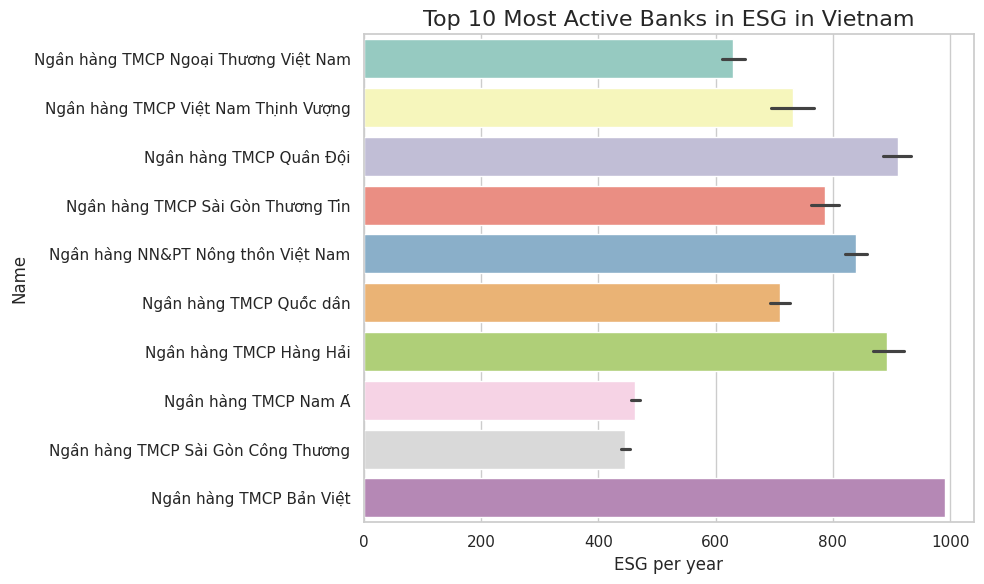

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the original data DataFrame
df = data
esg_per_year = data.groupby('year').size().reset_index(name='ESG_per_year')

# Merge the 'Action_per_year' column from action_per_year DataFrame
df = pd.merge(df, esg_per_year, on='year', how='left')

# Now you can sort by 'Action_per_year'
df = df.sort_values(by='ESG_per_year', ascending=True)

# Thiết lập màu sắc và phong cách
sns.set(style="whitegrid")
palette = sns.color_palette("Set3", len(df))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(
    x='ESG_per_year',
    y='name',
    data=df,
    palette=palette
)

# Thêm tiêu đề và nhãn
plt.title('Top 10 Most Active Banks in ESG in Vietnam', fontsize=16)
plt.xlabel('ESG per year', fontsize=12)
plt.ylabel('Name', fontsize=12)

# Tinh chỉnh hiển thị
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

<ipython-input-9-9b6e9c107991>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-9-9b6e9c107991>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


KeyError: 'error'

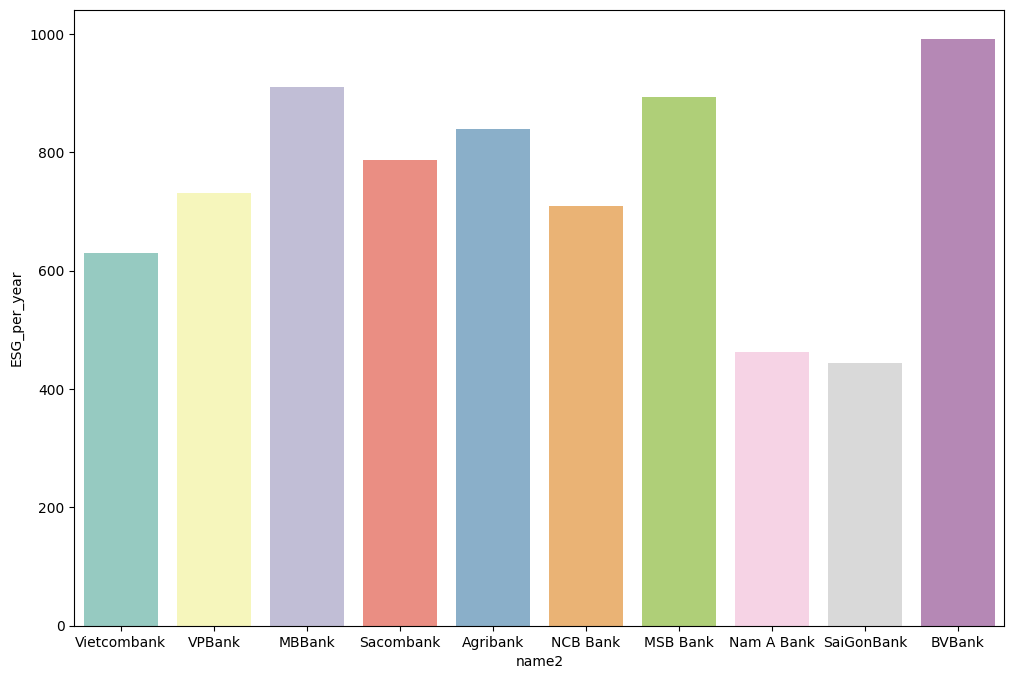

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data

# Sắp xếp theo số lượng ESG giảm dần
esg_per_year = data.groupby('year').size().reset_index(name='ESG_per_year')
# Merge esg_per_year with df on the 'year' column
df = pd.merge(df, esg_per_year, on='year', how='left')
df = df.sort_values(by="ESG_per_year", ascending=True)

# Vẽ biểu đồ dọc
plt.figure(figsize=(12, 8))
sns.barplot(
    x="name2",
    y="ESG_per_year",
    data=df,
    palette="Set3",
    ci=None
)

# Thêm error bar
plt.errorbar(
    x=range(len(df)),
    y=df["ESG_per_year"],
    yerr=df["error"],
    fmt="none",
    capsize=5,
    color="black"
)

# Tinh chỉnh hiển thị
plt.title("Top 10 Most Active Banks in ESG in Vietnam", fontsize=16)
plt.xlabel("Bank Name", fontsize=12)
plt.ylabel("ESG per year", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Xoay nhãn trên trục x
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

<ipython-input-20-8a3ffd4e70c1>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-20-8a3ffd4e70c1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


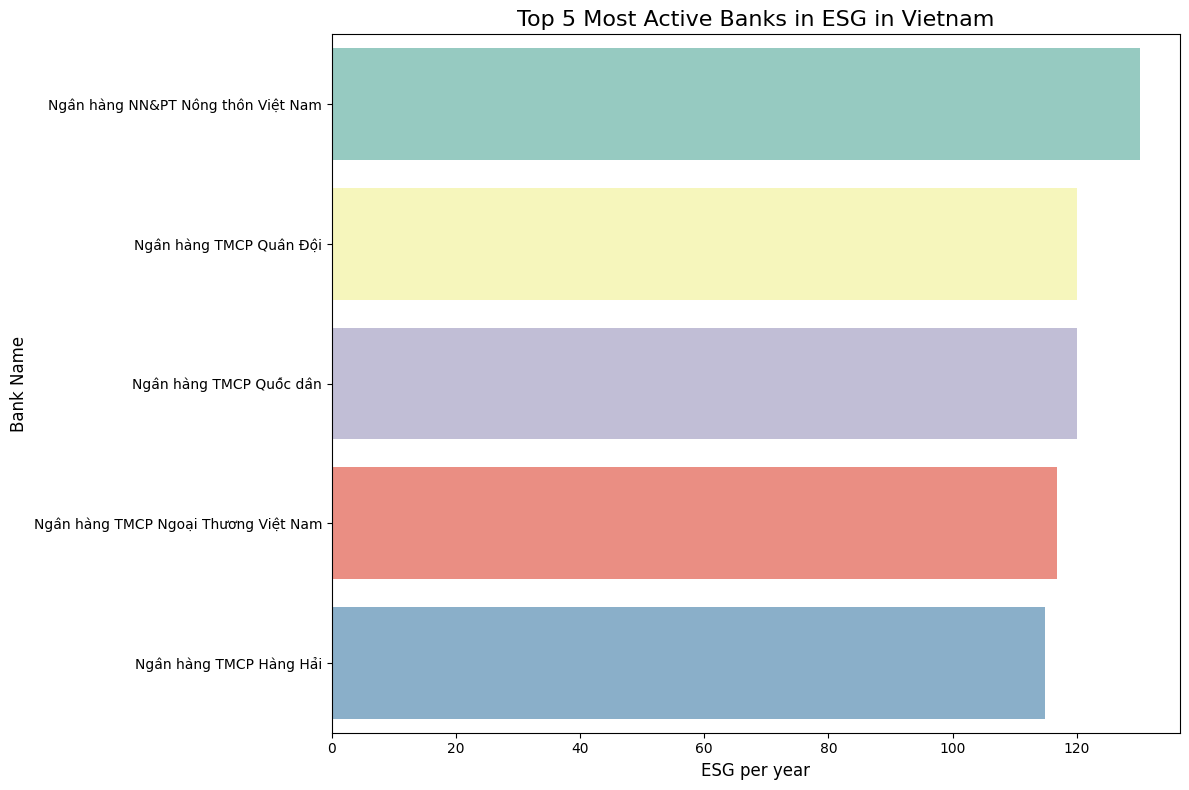

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đếm số lượng text cho từng ngân hàng trong từng năm
text_count = data.groupby(['year', 'name']).size().reset_index(name='count')

# Bước 2: Tính trung bình số lượng text theo năm cho từng ngân hàng
average_text_per_year = text_count.groupby('name')['count'].mean().reset_index(name='avg_count')

# Bước 3: Sắp xếp theo giá trị trung bình giảm dần
average_text_per_year = average_text_per_year.sort_values(by='avg_count', ascending=False).head(5)

# Bước 4: Vẽ biểu đồ dọc
plt.figure(figsize=(12, 8))
sns.barplot(
    x="avg_count",
    y="name",
    data=average_text_per_year,
    palette="Set3",
    ci=None
)

# Thêm tiêu đề và nhãn
plt.title("Top 5 Most Active Banks in ESG in Vietnam", fontsize=16)
plt.xlabel("ESG per year", fontsize=12)
plt.ylabel("Bank Name", fontsize=12)

# Tinh chỉnh hiển thị
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


<ipython-input-21-4ce00a4e3b96>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-21-4ce00a4e3b96>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


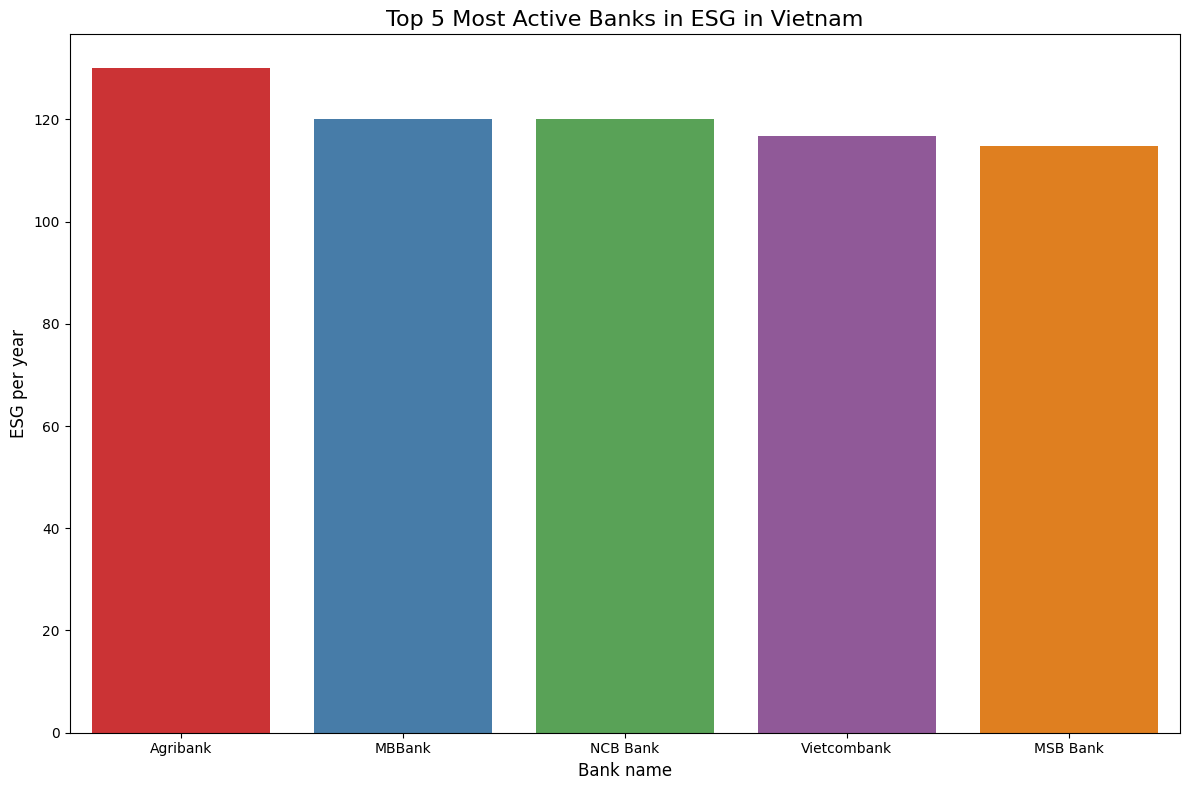

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đếm số lượng text cho từng ngân hàng trong từng năm
text_count = data.groupby(['year', 'name2']).size().reset_index(name='count')

# Bước 2: Tính trung bình số lượng text theo năm cho từng ngân hàng
average_text_per_year = text_count.groupby('name2')['count'].mean().reset_index(name='avg_count')

# Bước 3: Sắp xếp theo giá trị trung bình giảm dần
average_text_per_year = average_text_per_year.sort_values(by='avg_count', ascending=False).head(5)

# Bước 4: Vẽ biểu đồ dọc
plt.figure(figsize=(12, 8))
sns.barplot(
    x="name2",
    y="avg_count",
    data=average_text_per_year,
    palette="Set1",
    ci=None
)

# Thêm tiêu đề và nhãn
plt.title("Top 5 Most Active Banks in ESG in Vietnam", fontsize=16)
plt.xlabel("Bank name", fontsize=12)
plt.ylabel("ESG per year", fontsize=12)

# Tinh chỉnh hiển thị
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


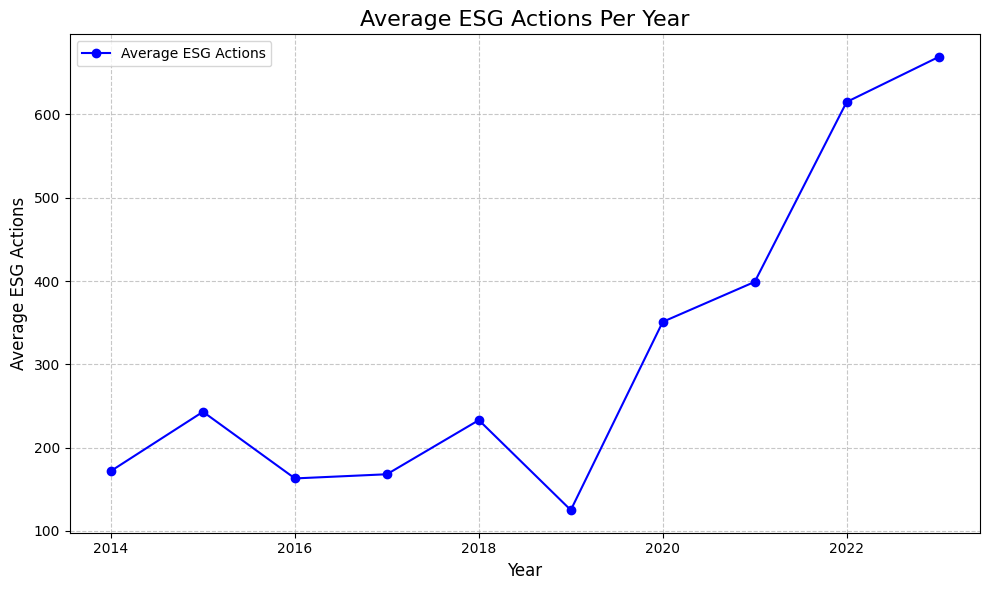

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử dữ liệu ban đầu là DataFrame 'data' với các cột 'year' và 'action'
# Tính trung bình số hành động ESG theo năm
avg_actions_per_year = data.groupby('year').size().mean()

# Tính số hành động theo từng năm
actions_per_year = data.groupby('year').size().reset_index(name='Average_actions_per_year')

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(actions_per_year['year'], actions_per_year['Average_actions_per_year'], marker='o', color='blue', label="Average ESG Actions")

# Thêm tiêu đề và nhãn
plt.title('Average ESG Actions Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average ESG Actions', fontsize=12)

# Hiển thị lưới và chú thích
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
